# Get Started in Deep Learning
Predictive modeling with deep learning is a skill that modern developers need to know.

TensorFlow is the premier open-source deep learning framework developed and maintained by Google. Although using TensorFlow directly can be challenging, the modern tf.keras API beings the simplicity and ease of use of Keras to the TensorFlow project.

Using tf.keras allows you to design, fit, evaluate, and use deep learning models to make predictions in just a few lines of code. It makes common deep learning tasks, such as classification and regression predictive modeling, accessible to average developers looking to get things done.

In this tutorial, you will discover a step-by-step guide to developing deep learning models in TensorFlow using the tf.keras API.
 Deep Learning Model Life-Cycle

In this section, you will discover the life-cycle for a deep learning model and the two tf.keras APIs that you can use to define models.
##  The 5-Step Model Life-Cycle

A model has a life-cycle, and this very simple knowledge provides the backbone for both modeling a dataset and understanding the tf.keras API.

The five steps in the life-cycle are as follows:

    Define the model.
    Compile the model.
    Fit the model.
    Evaluate the model.
    Make predictions.

In [1]:
#Load the librarys
import pandas as pd #To work with dataset
import numpy as np #Math library
import matplotlib.gridspec as gridspec
import seaborn as sns #Graph library that use matplot in background
import matplotlib.pyplot as plt #to plot some parameters in seaborn
import warnings
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.neighbors import KNeighborsClassifier
# Import StandardScaler from scikit-learn
from sklearn.preprocessing import PowerTransformer, StandardScaler,Normalizer,RobustScaler,MaxAbsScaler,MinMaxScaler,QuantileTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.manifold import TSNE
from sklearn.model_selection import GridSearchCV
# Import train_test_split()
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from datetime import datetime, date
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.model_selection import cross_val_score
import lightgbm as lgbm
from catboost import CatBoostRegressor
import  tensorflow as tf 
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import LearningRateScheduler
#import smogn
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor
# For training random forest model
import lightgbm as lgb
from scipy import sparse
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans 
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression,f_classif
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import PolynomialFeatures
from itertools import combinations
#import smong 
from sklearn.linear_model import LinearRegression, RidgeCV
import category_encoders as ce
import warnings
import optuna 
warnings.filterwarnings('ignore')

# Load the training data

In [2]:
# import lux
# Load the training data
train = pd.read_csv("../input/30-days-of-ml/train.csv")
test = pd.read_csv("../input/30-days-of-ml/test.csv")
# Preview the data
train.head()

,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,...,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,target
0,1,B,B,B,C,B,B,A,E,C,...,0.400361,0.160266,0.310921,0.389470,0.267559,0.237281,0.377873,0.322401,0.869850,8.113634
1,2,B,B,A,A,B,D,A,F,A,...,0.533087,0.558922,0.516294,0.594928,0.341439,0.906013,0.921701,0.261975,0.465083,8.481233
2,3,A,A,A,C,B,D,A,D,A,...,0.650609,0.375348,0.902567,0.555205,0.843531,0.748809,0.620126,0.541474,0.763846,8.364351
3,4,B,B,A,C,B,D,A,E,C,...,0.668980,0.239061,0.732948,0.679618,0.574844,0.346010,0.714610,0.540150,0.280682,8.049253
4,6,A,A,A,C,B,D,A,E,A,...,0.686964,0.420667,0.648182,0.684501,0.956692,1.000773,0.776742,0.625849,0.250823,7.972260


In [3]:
cat_columns = train.drop(['id','target'], axis=1).select_dtypes(exclude=['int64','float64']).columns
num_columns = train.drop(['id','target'], axis=1).select_dtypes(include=['int64','float64']).columns
train[train.select_dtypes(['float64']).columns] = train[train.select_dtypes(['float64']).columns].apply(pd.to_numeric)
train[train.select_dtypes(['object']).columns] = train.select_dtypes(['object']).apply(lambda x: x.astype('category'))


In [4]:
num_columns=['cont0', 'cont1', 'cont2', 'cont3', 'cont4', 'cont5', 'cont6', 'cont7',
       'cont8', 'cont9', 'cont10', 'cont11', 'cont12', 'cont13']
cat_columns=['cat0', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8',
       'cat9']
all_columns = (num_columns+cat_columns)
print(cat_columns)
print(num_columns)
print(all_columns)

['cat0', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8', 'cat9']
['cont0', 'cont1', 'cont2', 'cont3', 'cont4', 'cont5', 'cont6', 'cont7', 'cont8', 'cont9', 'cont10', 'cont11', 'cont12', 'cont13']
['cont0', 'cont1', 'cont2', 'cont3', 'cont4', 'cont5', 'cont6', 'cont7', 'cont8', 'cont9', 'cont10', 'cont11', 'cont12', 'cont13', 'cat0', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8', 'cat9']


# Prepare Data :

In [5]:
###################
Robustscaler  = make_pipeline( SimpleImputer(strategy='median',add_indicator=True),
                      
                        RobustScaler()
)
OneHotencoder = make_pipeline(
            SimpleImputer(strategy='most_frequent',add_indicator=True),
            OneHotEncoder() )


# Preprocess Pipe : 
##################
OneHot_RobustScaler = make_column_transformer(
    ( OneHotencoder , cat_columns),
    ( Robustscaler, num_columns))



###################

Ordinalencoder = make_pipeline(
            SimpleImputer(strategy='most_frequent',add_indicator=True),
            ce.ordinal.OrdinalEncoder() )
# Preprocess Pipe : 
##################
OrdinalEncoder_RobustScaler = make_column_transformer(
    ( Ordinalencoder , cat_columns),
    ( Robustscaler, num_columns))

In [6]:
# Create arrays for the features and the response variable
y = train['target']
X = train.drop(['id','target'], axis=1)
OneHot_RobustScaler.fit(X)
Xpre= OneHot_RobustScaler.transform(X)
test_final= test.drop(['id'], axis=1)
test_finalpre=OneHot_RobustScaler.transform(test_final)

In [7]:
# split into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(Xpre, y, test_size=0.1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(270000, 70) (30000, 70) (270000,) (30000,)


In [40]:
# set learning rate scheduler
# we can chage learning rate during learning

def lr_schedul(epoch):
    x = 0.001
    if epoch >= 5:
        x = 0.0005
    if epoch >= 10:
        x = 0.0001
    if epoch >= 20:
        x = 0.00005
    if epoch >= 30:
        x = 0.00001
    if epoch >= 60:
        x = 0.000001        
    return x

lr_decay = LearningRateScheduler(
    lr_schedul,
    verbose=1,
)

# Sequential Model API (Simple)

## More deep :Regularization in Deep Learning — L1, L2,BatchNormalization, and Dropout
**Get Better Model Performance**

**Reduce Overfitting With Dropout:**
Dropout is a clever regularization method that reduces overfitting of the training dataset and makes the model more robust.

This is achieved during training, where some number of layer outputs are randomly ignored or “dropped out.” This has the effect of making the layer look like – and be treated like – a layer with a different number of nodes and connectivity to the prior layer.

Dropout has the effect of making the training process noisy, forcing nodes within a layer to probabilistically take on more or less responsibility for the inputs.

You can add dropout to your models as a new layer prior to the layer that you want to have input connections dropped-out.

This involves adding a layer called Dropout() that takes an argument that specifies the probability that each output from the previous to drop. E.g. 0.4 means 40% percent of inputs will be dropped each update to the model.

**How to Accelerate Training With Batch Normalization**

The scale and distribution of inputs to a layer can greatly impact how easy or quickly that layer can be trained.

This is generally why it is a good idea to scale input data prior to modeling it with a neural network model.

Batch normalization is a technique for training very deep neural networks that standardizes the inputs to a layer for each mini-batch. This has the effect of stabilizing the learning process and dramatically reducing the number of training epochs required to train deep networks.

You can use batch normalization in your network by adding a batch normalization layer prior to the layer that you wish to have standardized inputs. You can use batch normalization with MLP, CNN, and RNN models.

**How to Halt Training at the Right Time With Early Stopping**

Neural networks are challenging to train. Too little training and the model is underfit; too much training and the model overfits the training dataset. Both cases result in a model that is less effective than it could be.

One approach to solving this problem is to use early stopping. This involves monitoring the loss on the training dataset and a validation dataset (a subset of the training set not used to fit the model). As soon as loss for the validation set starts to show signs of overfitting, the training process can be stopped.

Early stopping can be used with your model by first ensuring that you have a validation dataset. You can define the validation dataset manually via the validation_data argument to the fit() function, or you can use the validation_split and specify the amount of the training dataset to hold back for validation.

You can then define an EarlyStopping and instruct it on which performance measure to monitor, such as ‘val_loss‘ for loss on the validation dataset, and the number of epochs to observed overfitting before taking action, e.g. 

This configured EarlyStopping callback can then be provided to the fit() function via the “callbacks” argument that takes a list of callbacks.

This allows you to set the number of epochs to a large number and be confident that training will end as soon as the model starts overfitting. You might also like to create a learning curve to discover more insights into the learning dynamics of the run and when training was halted.




In [9]:
# mlp for binary classification
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
# determine the number of input features
n_features = X_train.shape[1]
# define model
# Create model here
model_reg2 =tf.keras.Sequential()
model_reg2.add(layers.Dense(50,  input_shape=(n_features,),kernel_initializer='he_normal',
                            kernel_regularizer=tf.keras.regularizers.l1_l2(l1=1e-5, l2=1e-4),
                            activation = 'relu')) # Rectified Linear Unit Activation Function
model_reg2.add(layers.BatchNormalization())
model_reg2.add(layers.Dropout(0.45))
model_reg2.add(layers.Dense(40, activation = 'relu',kernel_initializer='he_normal',))
model_reg2.add(layers.BatchNormalization())
model_reg2.add(layers.Dropout(0.3))
model_reg2.add(layers.Dense(30, activation = 'relu',kernel_initializer='he_normal',))
model_reg2.add(layers.BatchNormalization())
model_reg2.add(layers.Dropout(0.2))
model_reg2.add(layers.Dense(5, activation = 'relu',kernel_initializer='he_normal',))
model_reg2.add(layers.Dense(1, activation = 'linear')) # linear for regression 
# Compile model here
optimizer = tf.keras.optimizers.Adam(learning_rate=2e-5)
model_reg2.compile(loss = 'mean_squared_error', optimizer = optimizer,
              metrics = [tf.keras.metrics.RootMeanSquaredError(name='rmse')])
EPOCHS =1000
# configure early stopping
es = EarlyStopping(monitor='val_loss',min_delta=0.0000000000001,
                   restore_best_weights=True,patience=10)
#batch_size=1000
# fit model using our gpu
with tf.device('/gpu:0'):
     history2 = model_reg2.fit(Xpre,y,batch_size=256,epochs=EPOCHS, 
                         validation_split = 0.1,
                         verbose=-1 ,callbacks=[lr_decay ,es],shuffle=True)

Epoch 1/1000

Epoch 00001: LearningRateScheduler reducing learning rate to 0.01.
Epoch 2/1000

Epoch 00002: LearningRateScheduler reducing learning rate to 0.01.
Epoch 3/1000

Epoch 00003: LearningRateScheduler reducing learning rate to 0.01.
Epoch 4/1000

Epoch 00004: LearningRateScheduler reducing learning rate to 0.01.
Epoch 5/1000

Epoch 00005: LearningRateScheduler reducing learning rate to 0.01.
Epoch 6/1000

Epoch 00006: LearningRateScheduler reducing learning rate to 0.005.
Epoch 7/1000

Epoch 00007: LearningRateScheduler reducing learning rate to 0.005.
Epoch 8/1000

Epoch 00008: LearningRateScheduler reducing learning rate to 0.005.
Epoch 9/1000

Epoch 00009: LearningRateScheduler reducing learning rate to 0.005.
Epoch 10/1000

Epoch 00010: LearningRateScheduler reducing learning rate to 0.005.
Epoch 11/1000

Epoch 00011: LearningRateScheduler reducing learning rate to 0.001.
Epoch 12/1000

Epoch 00012: LearningRateScheduler reducing learning rate to 0.001.
Epoch 13/1000

Epo

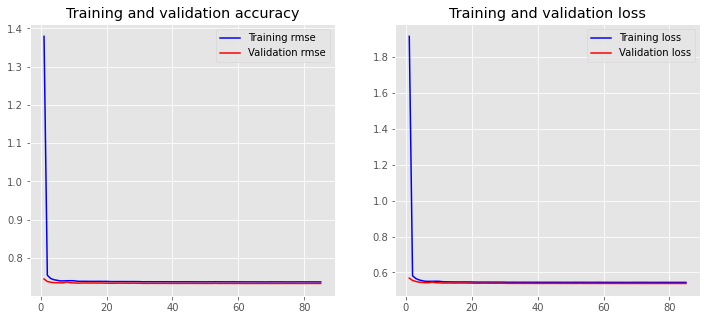

In [10]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
def plot_history(history):
    acc = history.history['rmse']
    val_acc = history.history['val_rmse']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training rmse')
    plt.plot(x, val_acc, 'r', label='Validation rmse')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend() 
    
plot_history(history2)

In [11]:
# evaluate the keras model

loss3, rmse3 = model_reg2.evaluate( X_test, y_test, verbose=2)
print(" rmse".format(rmse3))

938/938 - 1s - loss: 0.5437 - rmse: 0.7371
 rmse


## Functional api :Advanced Appproch 
### Use a Learned Embedding for Categorical Data

A learned embedding, or simply an “embedding,” is a distributed representation for categorical data.

Each category is mapped to a distinct vector, and the properties of the vector are adapted or learned while training a neural network. The vector space provides a projection of the categories, allowing those categories that are close or related to cluster together naturally.

This provides both the benefits of an ordinal relationship by allowing any such relationships to be learned from data, and a one hot encoding in providing a vector representation for each category. Unlike one hot encoding, the input vectors are not sparse (do not have lots of zeros). The downside is that it requires learning as part of the model and the creation of many more input variables (columns).

The technique was originally developed to provide a distributed representation for words, e.g. allowing similar words to have similar vector representations. As such, the technique is often referred to as a word embedding, and in the case of text data, algorithms have been developed to learn a representation independent of a neural network. 

**Embedding Layer**

An embedding layer is pretty simple. It can be thought of as a lookup table of weights that has the same number of rows as your output embedding vector, and the same number of columns as there are categories in your categorical feature. For example, if you had 10 different elements in your categorical feature, you could visualise your embedding layer like so:

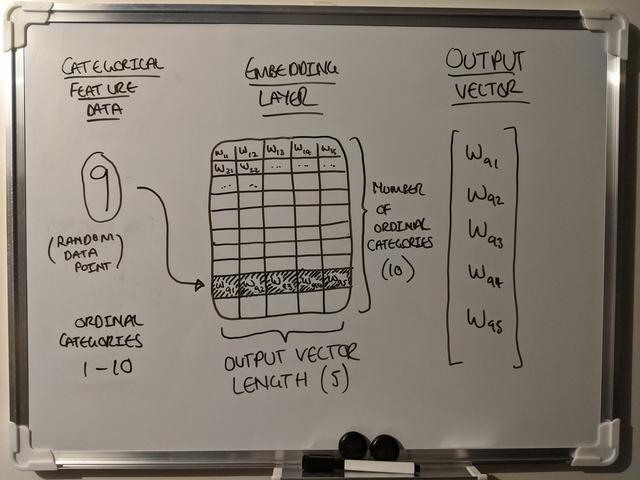
This embedding layer would convert each sample in your categorical feature into a vector of length 5. As it trains, your network will then update the weights in the table to best "describe" each element of your categorical feature.
Adding Embedding Layers to an MLP

Embedding layers like the above can be added for each of the categorical features in your dataset. The values from the vector outputs of these embeddings can then be fed into a basic MLP alongside the numeric data in your dataset, which is fed straight into the MLP unchanged:

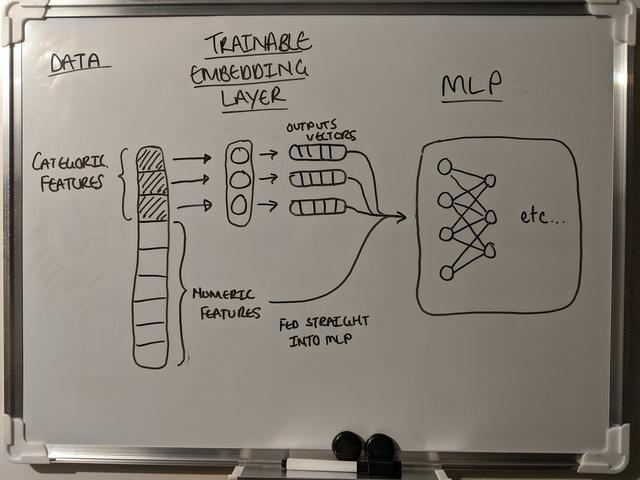

he whole network is then trained in forward / backward passes that begin and end at the embedding layers. By training the embedding layers, the network can learn the best embedding that represents the different features of the categorical variables.

**Embeddings can be used in Keras via the Embedding layer.**

One embedding layer is required for each categorical variable, and the embedding expects the categories to be ordinal encoded, although no relationship between the categories is assumed.

Each embedding also requires the number of dimensions to use for the distributed representation (vector space). It is common in natural language applications to use 50, 100, or 300 dimensions. For our small example, we will fix the number of dimensions at 10, but this is arbitrary; you should experimenter with other values.
##### Define the model : 


In [41]:
def generate_categorical_feature_tf(cat_columns,num_columns,data):
    models= []
    inputs = []
    for cat in cat_columns:
        
        vocab_size = data[cat].nunique()+1
        
        no_of_unique_cat  = len(np.unique(data[cat]))
        #Jeremy Howard provides the following rule of thumb; embedding size = min(50, number of categories/2).
        embedding_size = min(np.ceil((no_of_unique_cat)/2), 50 )
        embedding_size = int(embedding_size)
        
        inpt = tf.keras.layers.Input(shape=(1,),name='input_'+'_'.join(cat.split(' ')))
        inputs.append(inpt)
        embed = tf.keras.layers.Embedding(vocab_size,embedding_size,\
                                          trainable=True,embeddings_initializer=tf.initializers.random_normal)(inpt)
        embed_rehsaped =tf.keras.layers.Reshape(target_shape=(embedding_size,))(embed)
        models.append(embed_rehsaped)
    num_input = tf.keras.layers.Input(shape=(len(num_columns)),\
                                      name='input_number_features')
    inputs.append(num_input)
    models.append(num_input)
    merge_models= tf.keras.layers.concatenate(models)
    pre_preds = tf.keras.layers.Dense(60)(merge_models)
    pre_preds = tf.keras.layers.BatchNormalization()(pre_preds)
    pre_preds = tf.keras.layers.Dense(40)(pre_preds)
    pre_preds = tf.keras.layers.BatchNormalization()(pre_preds)
    pre_preds = tf.keras.layers.Dense(20)(pre_preds)
    pre_preds = tf.keras.layers.BatchNormalization()(pre_preds)
    pred = tf.keras.layers.Dense(1)(pre_preds)
    model_full = tf.keras.models.Model(inputs= inputs,\
                                       outputs =pred)
    # Compile model here
    optimizer = tf.keras.optimizers.Adam(learning_rate=2e-5)
    model_full.compile(loss = 'mean_squared_error', optimizer = optimizer,
            metrics = [tf.keras.metrics.RootMeanSquaredError(name='rmse')])
    return model_full

##### Prepare Data  : 

In [13]:
OrdinalEncoder_RobustScaler.fit(X)
Xpre_emb= OrdinalEncoder_RobustScaler.transform(X)
Xpre_emb_df= pd.DataFrame(Xpre_emb,columns=X.columns)
test_final= test.drop(['id'], axis=1)
test_final_emb=OrdinalEncoder_RobustScaler.transform(test_final)
test_final_emb_df= pd.DataFrame(test_final_emb,columns=X.columns)
cat_columns = train.drop(['id','target'], axis=1).select_dtypes(exclude=['int64','float64']).columns
num_columns = train.drop(['id','target'], axis=1).select_dtypes(include=['int64','float64']).columns

##### compile the mode : 

In [42]:
model = generate_categorical_feature_tf(cat_columns,num_columns,Xpre_emb_df)

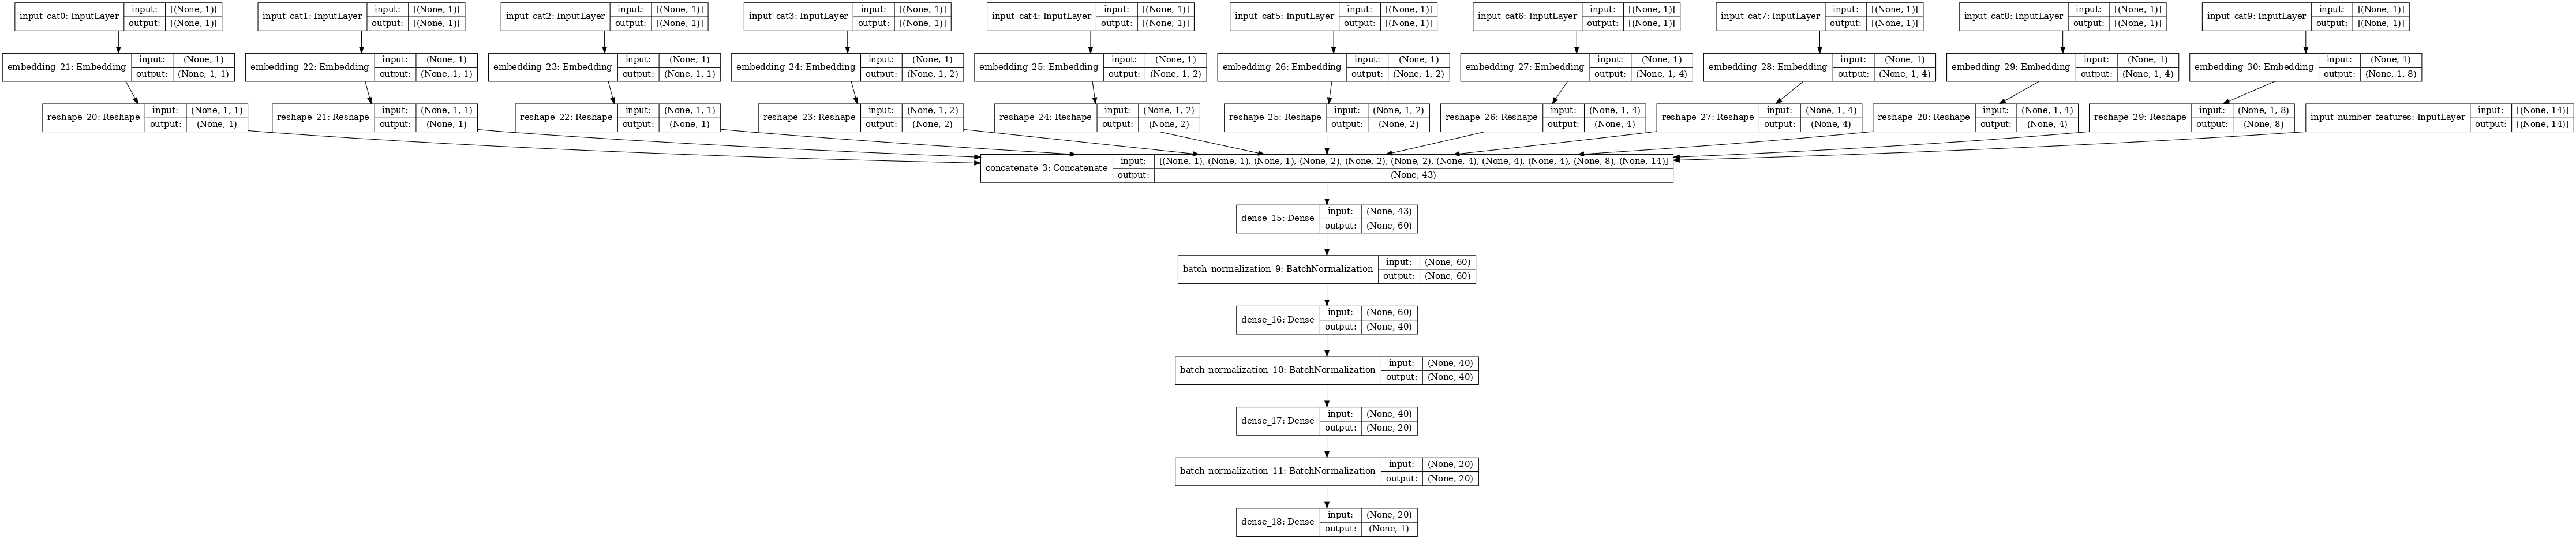

In [43]:
tf.keras.utils.plot_model(model=model, show_shapes=True, dpi=76, )

**Now the last thing is to feed the data to our model.**

Since we have used a multi input neural network, it is best practice to feed your train data as a dictionary, where your keys are the name of the Input layer and the values are what each layer is expected to have. So let us do that so you can understand what I mean :

In [16]:
print(cat_columns)

Index(['cat0', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8',
       'cat9'],
      dtype='object')


In [50]:
input_dict= {
    'input_cat0':Xpre_emb_df[cat_columns[0]],
    "input_cat1":Xpre_emb_df[cat_columns[1]],
    "input_cat2":Xpre_emb_df[cat_columns[2]],
    "input_cat3":Xpre_emb_df[cat_columns[3]],
    "input_cat4":Xpre_emb_df[cat_columns[4]],
    "input_cat5":Xpre_emb_df[cat_columns[5]],
    "input_cat6":Xpre_emb_df[cat_columns[6]],
    "input_cat7":Xpre_emb_df[cat_columns[7]],
    "input_cat8":Xpre_emb_df[cat_columns[8]],
    "input_cat9":Xpre_emb_df[cat_columns[9]],
    "input_number_features": Xpre_emb_df[num_columns]
}


test_dict= {
    'input_cat0':test_final_emb_df[cat_columns[0]],
    "input_cat1":test_final_emb_df[cat_columns[1]],
    "input_cat2":test_final_emb_df[cat_columns[2]],
    "input_cat3":test_final_emb_df[cat_columns[3]],
    "input_cat4":test_final_emb_df[cat_columns[4]],
    "input_cat5":test_final_emb_df[cat_columns[5]],
    "input_cat6":test_final_emb_df[cat_columns[6]],
    "input_cat7":test_final_emb_df[cat_columns[7]],
    "input_cat8":test_final_emb_df[cat_columns[8]],
    "input_cat9":test_final_emb_df[cat_columns[9]],
    "input_number_features": test_final_emb_df[num_columns]
}

In [44]:
#model.fit(input_dict,labels*1,epochs=50,batch_size=64,class_weight=\{0:0.5,1:0.5})

EPOCHS =1000
# configure early stopping
es = EarlyStopping(monitor='val_loss',min_delta=0.0000000000001,
                   restore_best_weights=True,patience=10)
#batch_size=1000
# fit model using our gpu
with tf.device('/gpu:0'):
     history_emb1 = model.fit(input_dict,y,batch_size=256,epochs=EPOCHS, 
                         validation_split = 0.1,
                         verbose=50 ,callbacks=[lr_decay ,es],shuffle=True)

Epoch 1/1000

Epoch 00001: LearningRateScheduler reducing learning rate to 0.001.
Epoch 2/1000

Epoch 00002: LearningRateScheduler reducing learning rate to 0.001.
Epoch 3/1000

Epoch 00003: LearningRateScheduler reducing learning rate to 0.001.
Epoch 4/1000

Epoch 00004: LearningRateScheduler reducing learning rate to 0.001.
Epoch 5/1000

Epoch 00005: LearningRateScheduler reducing learning rate to 0.001.
Epoch 6/1000

Epoch 00006: LearningRateScheduler reducing learning rate to 0.0005.
Epoch 7/1000

Epoch 00007: LearningRateScheduler reducing learning rate to 0.0005.
Epoch 8/1000

Epoch 00008: LearningRateScheduler reducing learning rate to 0.0005.
Epoch 9/1000

Epoch 00009: LearningRateScheduler reducing learning rate to 0.0005.
Epoch 10/1000

Epoch 00010: LearningRateScheduler reducing learning rate to 0.0005.
Epoch 11/1000

Epoch 00011: LearningRateScheduler reducing learning rate to 0.0001.
Epoch 12/1000

Epoch 00012: LearningRateScheduler reducing learning rate to 0.0001.
Epoch 

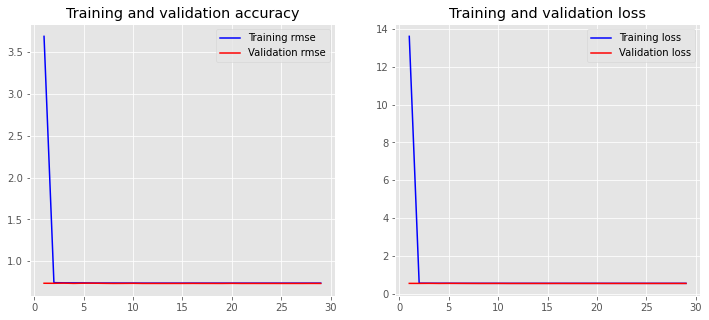

In [45]:
plot_history(history_emb1)

In [52]:
hist = pd.DataFrame(history_emb1.history)
hist['epoch'] = history_emb1.epoch
hist.to_csv('model_history.csv', index=False)
hist

,loss,rmse,val_loss,val_rmse,lr,epoch
0,13.612516,3.689514,0.543427,0.737175,0.00100,0
1,0.554227,0.744464,0.542633,0.736636,0.00100,1
2,0.551525,0.742647,0.545517,0.738591,0.00100,2
3,0.549964,0.741595,0.541077,0.735579,0.00100,3
4,0.549613,0.741359,0.544581,0.737957,0.00100,4
5,0.547148,0.739694,0.544621,0.737984,0.00050,5
6,0.547224,0.739746,0.542101,0.736275,0.00050,6
7,0.547115,0.739672,0.540347,0.735083,0.00050,7
8,0.546601,0.739325,0.541023,0.735542,0.00050,8
9,0.546676,0.739375,0.542271,0.736391,0.00050,9


In [48]:
# evaluate the keras model
loss, rmse = model.evaluate( input_dict, y, verbose=2)
print(" rmse".format(rmse))

9375/9375 - 35s - loss: 0.5449 - rmse: 0.7382
 rmse


## Create an input pipeline using tf.data

Next, we will wrap the dataframes with tf.data. This will enable us to use feature columns as a bridge to map from the columns in the Pandas dataframe to features used to train the model. If we were working with a very large CSV file (so large that it does not fit into memory), we would use tf.data to read it from disk directly. That is not covered in this notebook .


In [30]:
train1 = pd.read_csv("../input/30-days-of-ml/train.csv")
test1 = pd.read_csv("../input/30-days-of-ml/test.csv")

In [34]:
# A utility method to create a tf.data dataset from a Pandas Dataframe
def df_to_dataset(dataframe, shuffle=True, batch_size=256):
    dataframe = dataframe.drop(['id'], axis=1).copy()
    labels = dataframe.pop('target')
    ds = tf.data.Dataset.from_tensor_slices((dict(dataframe), labels))
    if shuffle:
        ds = ds.shuffle(buffer_size=len(dataframe))
    ds = ds.batch(batch_size)
    return ds

# A utility method to create a tf.data dataset from a Pandas Dataframe
def test_to_dataset(dataframe, shuffle=True, batch_size=256):
    dataframe =  dataframe.drop(['id'], axis=1).copy()
    #labels = dataframe.pop('target')
    ds = tf.data.Dataset.from_tensor_slices(dict(dataframe))
    if shuffle:
        ds = ds.shuffle(buffer_size=len(dataframe))
    ds = ds.batch(batch_size)
    return ds

In [33]:
batch_size = 5 # A small batch sized is used for demonstration purposes
#train_ds = df_to_dataset(train, batch_size=batch_size)
#test_ds = test_to_dataset(train, batch_size=batch_size)


## Understand the input pipeline

Now that we have created the input pipeline, let's call it to see the format of the data it returns. We have used a small batch size to keep the output readable.


for feature_batch, label_batch in train_ds.take(1):
    print('Every feature:', list(feature_batch.keys()))
    print('A batch of cat0:', feature_batch['cat0'])
    print('A batch of targets:', label_batch )

We can see that the dataset returns a dictionary of column names (from the dataframe) that map to column values from rows in the dataframe.

**Demonstrate several types of feature columns**

TensorFlow provides many types of feature columns. In this section, we will create several types of feature columns, and demonstrate how they transform a column from the dataframe.

# We will use this batch to demonstrate several types of feature columns
example_batch = next(iter(train_ds))[0]
# A utility method to create a feature column
# and to transform a batch of data
def demo(feature_column):
    feature_layer = layers.DenseFeatures(feature_column)
    print(feature_layer(example_batch).numpy())


# Numeric columns

The output of a feature column becomes the input to the model (using the demo function defined above, we will be able to see exactly how each column from the dataframe is transformed). A numeric column is the simplest type of column. It is used to represent real valued features. When using this column, your model will receive the column value from the dataframe unchanged.


In [51]:
predictions = model.predict(test_dict)
predictions = predictions.flatten()
# Save the predictions to a CSV file
output = pd.DataFrame({'Id': test.id,
                       'target': predictions})
output.to_csv('embed1.csv', index=False)
output

,Id,target
0,0,8.054185
1,5,8.328626
2,15,8.344221
3,16,8.167255
4,17,8.219910
...,...,...
199995,499987,8.213369
199996,499990,8.204759
199997,499991,8.252804
199998,499994,8.232205


# Summuray 

We tried  encoding tecthniques in order to have better results 
As is always the case with neural networks, there are a huge number of possible architectures and parameters to play around with. Possible interesting avenues include:

    adding / removing / widening / shortening layers in the network
    adjusting the regularization layers / parameters (dropout / l2)
    adding new regularization parameters
    changing activation functions
    changing the gradient descent optimizer
    adjusting the learning rate and no of epochs
    etc, etc.....

With some tinkering, you'll find that the networks performance can quickly approach that of the aforementioned popular models. Neural networks like this also offer a huge amount of flexibility which can offer some really promising avenues for improving your scores.

Note: you can dramatically improve the training time of the model by increasing the batch size and utilizing a GPU session!

reference : 
to try : 
deep + kfold : 

https://www.kaggle.com/lucamassaron/deep-learning-for-tabular-data



https://mmuratarat.github.io/2019-06-12/embeddings-with-numeric-variables-Keras

https://www.slideshare.net/MeetupDataScienceRoma/deep-learning-for-tabular-data-luca-massaron

https://medium.com/analytics-vidhya/tensorflow-2-tutorial-on-categorical-features-embedding-93dd81027ea9

https://www.kaggle.com/mtinti/keras-starter-with-bagging-1111-84364

https://www.kaggle.com/faressayah/tensorflow-2-tutorial-get-started-in-deep-learning

https://www.kaggle.com/colinmorris/embedding-layers

https://www.kaggle.com/dustyturner/dense-nn-with-categorical-embeddings

wrap keras regressor : 

https://machinelearningmastery.com/regression-tutorial-keras-deep-learning-library-python/





cat embedding : 

https://machinelearningmastery.com/how-to-prepare-categorical-data-for-deep-learning-in-python/